In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from matplotlib import cm

In [2]:
def drawData(X,y,title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))               
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=-y, cmap="jet", alpha=0.6)
    plt.title(title)



In [3]:
def drawDecisionBoundary(model,X,title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))               
    plt.figure(figsize=(10, 8))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy, Z, alpha = 0.4, cmap="binary")
    plt.scatter(X[:, 0], X[:, 1], c=-y, cmap="jet", alpha=0.6)
    plt.title(title)
    
    ####  students - add code below to display support vectors  ####
    
    ##### START STUDENT CODE #####
    
    print("support vector quantity: ", model.support_.shape)
    #print(X[model.support_])
    svecs = X[model.support_]
    plt.scatter(svecs[:, 0], svecs[:, 1], marker='x', s=80 , c='k', alpha  = 0.5)
    
    ##### END STUDENT CODE #####

    ################################################################


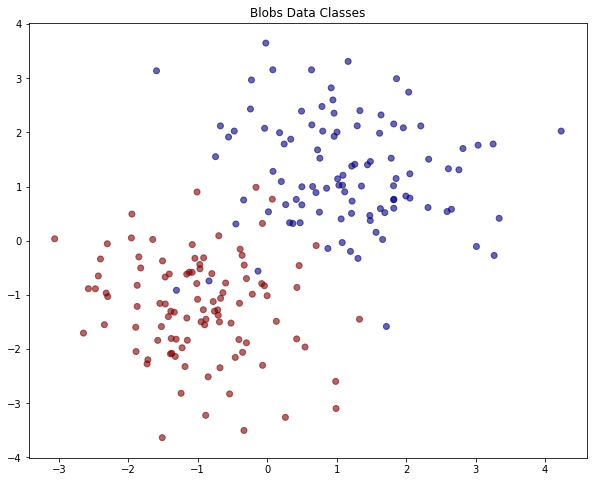

In [4]:
sampleSeed = 1
dsetSize = 200
BLOBS = 1
CONCENTRIC = 2
datasettype = BLOBS  #TRY AN ALTERNATE DATASET HERE
#datasettype = CONCENTRIC  #TRY AN ALTERNATE DATASET HERE by uncommenting

if datasettype==BLOBS:    
    #generate blobs which are not quite linearly separable
    X,y = datasets.make_blobs(dsetSize,2,centers = [[-1.2,-1.2],[1.2,1.2]],
                              random_state = sampleSeed)
    drawData(X,y,"Blobs Data Classes")

if datasettype==CONCENTRIC:   
    #generate concentric ring data
    circleNoise = 0.1
    innerCircleFactor = 0.3
    X,y = datasets.make_circles(n_samples=dsetSize, noise = circleNoise,
                            factor = innerCircleFactor, random_state = sampleSeed )
    drawData(X,y,"Concentric Ring Data Classes")

    

support vector quantity:  (39,)


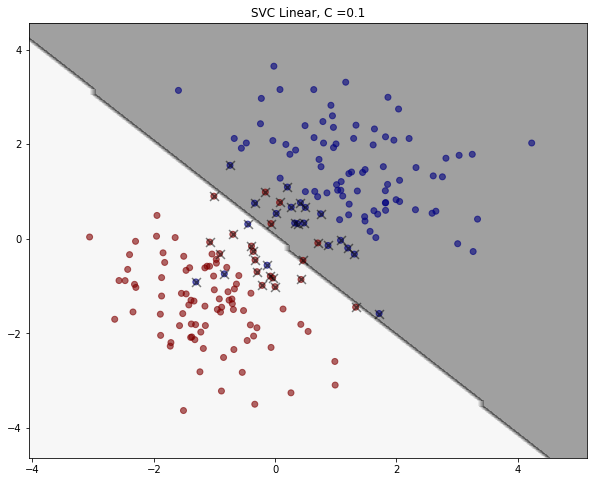

In [5]:
#########################################
#  FIT A SVM CLASSIFIER MODEL
#########################################

SVC_Type='linear'          #try different kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
myC = 0.1                    #try different values for C
polydegree = 2                 #try different degrees (only needed for poly kernel)

if SVC_Type=='linear':
    modelSVCl = svm.SVC(kernel = 'linear', C=myC)
    plotTitle = "SVC Linear, C =" + str(myC)
if SVC_Type=='poly':
    modelSVCl = svm.SVC(kernel = 'poly', degree=polydegree, C=myC)
    plotTitle = "SVC poly - degree = " + polydegree + " C= " +str(myC)
if SVC_Type=='rbf':
    modelSVCl = svm.SVC(kernel = 'rbf', C=myC)
    plotTitle = "SVC rbf, C= " + str(myC)
if SVC_Type=='sigmoid':
    modelSVCl = svm.SVC(kernel = 'sigmoid', C=myC)
    plotTitle = "SVC sigmoid, C= " + str(myC)
    
modelSVCl.fit(X,y)

#########################################
#  DRAW DECISION BOUNDARY
#########################################
 
drawDecisionBoundary(modelSVCl,X,plotTitle)
plt.show()